# Cousera Machine Learning Course- Andrew Ng ( Python Implementation)

 ##                                         Support Vector Machines

In [1]:
#import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
data=loadmat("ex6data1.mat")

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
#dividing between feartures and labels
X=data["X"]
y=data["y"]

Text(0, 0.5, 'X_1')

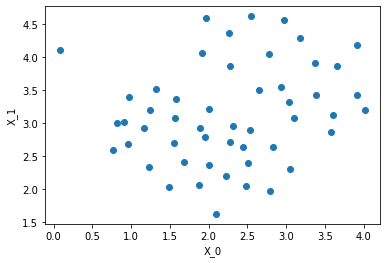

In [5]:
plt.scatter(X[:,0],X[:,1]) # simply a scatter plot between X_0 and X_1
plt.xlabel("X_0")
plt.ylabel("X_1")

Text(0, 0.5, 'X_1')

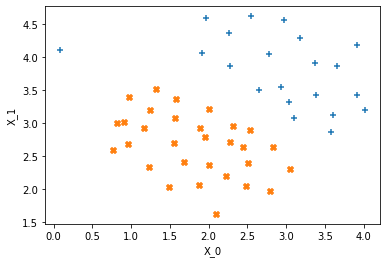

In [6]:
m,n= X.shape[0],X.shape[1] # m in size of training set and n is no of featurres
pos_index,neg_index=(y==1).reshape(m,1),(y==0).reshape(m,1)
plt.scatter(X[pos_index[:,0],0],X[pos_index[:,0],1],marker="+")
plt.scatter(X[neg_index[:,0],0],X[neg_index[:,0],1],marker="X")# positive xeamples
plt.xlabel("X_0")
plt.ylabel("X_1")

### Using support vector machines

In [7]:
from sklearn.svm import SVC
classifier= SVC(kernel="linear")
classifier.fit(X,y.flatten())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

(1.5, 5.0)

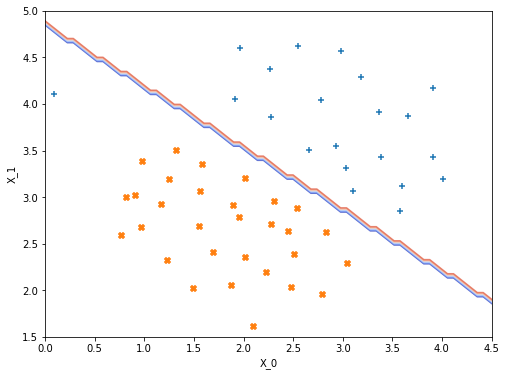

In [8]:
plt.figure(figsize=(8,6))
pos_index,neg_index=(y==1).reshape(m,1),(y==0).reshape(m,1)
plt.scatter(X[pos_index[:,0],0],X[pos_index[:,0],1],marker="+")# positive examples
plt.scatter(X[neg_index[:,0],0],X[neg_index[:,0],1],marker="X")# negative example
plt.xlabel("X_0")
plt.ylabel("X_1")

#create a mesh to plot 

x_min,x_max= X[:,0].min() - 1,X[:,0].max() +1
y_min,y_max=X[:,1].min() - 1,X[:,1].max() +1

# we will use meshgrid so Return coordinate matrices from coordinate vectors.Make N-D coordinate arrays
#for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate
#arrays x1, x2,…, xn.
# point in the mesh [x_min, x_max]x[y_min, y_max]
xx,yy=np.meshgrid(np.linspace(x_min,x_max,num=100),np.linspace(y_min,y_max,num=100))


#z predict the classification accoring to xx and yy
Z=classifier.predict(np.c_[np.ravel(xx),np.ravel(yy)]) 
##numpy.c_ >>>Translates slice objects to concatenation along the second axis.
#>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
###array([[1, 2, 3, 0, 0, 4, 5, 6]])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.xlim(0,4.5)
plt.ylim(1.5,5)

In [9]:
xx.shape

(100, 100)

### Test for C=100

In [10]:
from sklearn.svm import SVC
classifier_100= SVC(kernel="linear",C=100)
classifier_100.fit(X,y.flatten())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

(1.5, 5.0)

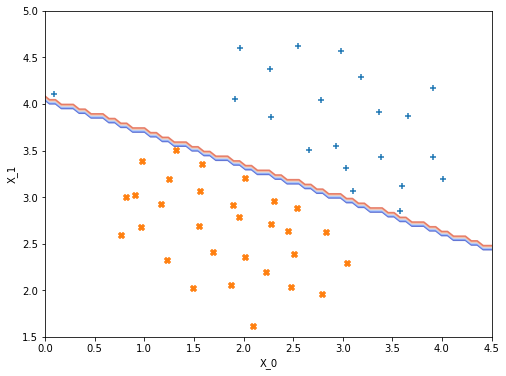

In [11]:
plt.figure(figsize=(8,6))
pos_index,neg_index=(y==1).reshape(m,1),(y==0).reshape(m,1)
plt.scatter(X[pos_index[:,0],0],X[pos_index[:,0],1],marker="+")# positive examples
plt.scatter(X[neg_index[:,0],0],X[neg_index[:,0],1],marker="X")# negative example
plt.xlabel("X_0")
plt.ylabel("X_1")

#create a mesh to plot 

x_min,x_max= X[:,0].min() - 1,X[:,0].max() +1
y_min,y_max=X[:,1].min() - 1,X[:,1].max() +1

# we will use meshgrid so Return coordinate matrices from coordinate vectors.Make N-D coordinate arrays
#for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate
#arrays x1, x2,…, xn.
# point in the mesh [x_min, x_max]x[y_min, y_max]
xx,yy=np.meshgrid(np.linspace(x_min,x_max,num=100),np.linspace(y_min,y_max,num=100))


#z predict the classification accoring to xx and yy
Z=classifier_100.predict(np.c_[np.ravel(xx),np.ravel(yy)]) 
##numpy.c_ >>>Translates slice objects to concatenation along the second axis.
#>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
###array([[1, 2, 3, 0, 0, 4, 5, 6]])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.xlim(0,4.5)
plt.ylim(1.5,5)

## SVM with gaussian kernels

In [12]:
data2=loadmat("ex6data2.mat")

In [13]:
X2=data2["X"]
y2=data2["y"]

In [14]:
y2.shape

(863, 1)

## Plotting of data

In [15]:
m2,n2=X2.shape[0],X2.shape[1]

(0.4, 1.0)

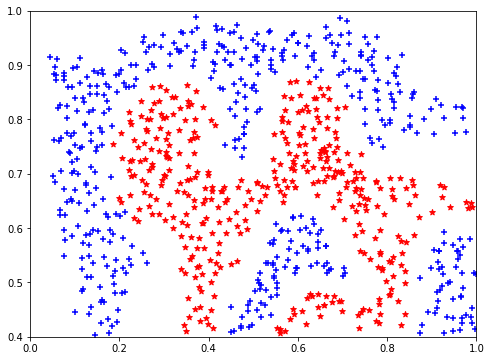

In [16]:
plt.figure(figsize=(8,6))
pos2,neg2= (y2==1).reshape(m2,1),(y2==0).reshape(m2,1)
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],marker="+",c="blue")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],marker="*",c="red")
plt.xlim(0,1)
plt.ylim(0.4,1)

## RBF SVM parameters
This example illustrates the effect of the parameters gamma and C of the Radial Basis Function (RBF) kernel SVM.

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words``C`` behaves as a regularization parameter in the SVM.

In [17]:
classifier_gaussian=SVC(kernel="rbf",gamma=30)
classifier_gaussian.fit(X2,y2.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Visualising the decision boundary

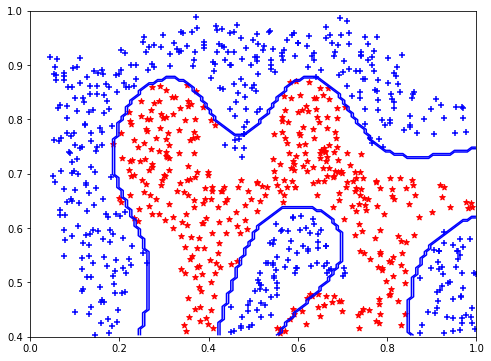

In [18]:
plt.figure(figsize=(8,6))
pos2,neg2= (y2==1).reshape(m2,1),(y2==0).reshape(m2,1)
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],marker="+",c="blue")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],marker="*",c="red")
plt.xlim(0,1)
plt.ylim(0.4,1)

#creating a meshgrid

X2_min,X2_max= X2[:,0].min(),X2[:,0].max()
y2_min,y2_max=X2[:,1].min(),X2[:,1].max()

# we will use meshgrid so Return coordinate matrices from coordinate vectors.Make N-D coordinate arrays
#for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate
#arrays x1, x2,…, xn.
# point in the mesh [x_min, x_max]x[y_min, y_max]
xx2,yy2=np.meshgrid(np.linspace(X2_min,X2_max,num=100),np.linspace(y2_min,y2_max,num=100))
#z predict the classification accoring to xx and yy
Z_gaussian=classifier_gaussian.predict(np.c_[np.ravel(xx2),np.ravel(yy2)])

##numpy.c_ >>>Translates slice objects to concatenation along the second axis.
#>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
###array([[1, 2, 3, 0, 0, 4, 5, 6]])

# Put the result into a color plot
Z_gaussian=Z_gaussian.reshape(xx2.shape)
plt.contour(xx2, yy2,Z_gaussian,1,colors="b")


## Hyper Parameter Tuning

In [19]:
mat3 = loadmat("ex6data3.mat")
X3 = mat3["X"]
y3 = mat3["y"]
Xval = mat3["Xval"]
yval = mat3["yval"]

In [20]:
m3,n3=X3.shape[0],X3.shape[1]

In [21]:
m3,n3

(211, 2)

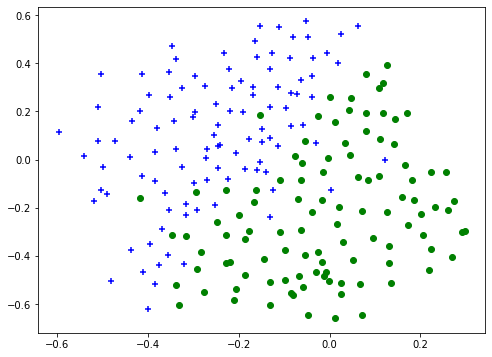

In [22]:
plt.figure(figsize=(8,6))
pos3,neg3= (y3==1).reshape(m3,1),(y3==0).reshape(m3,1)
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],marker="+",c='blue')
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],marker="o",c='green')

### Use GridsearchCV
One of the great things about GridSearchCV is that it is a meta-estimator.
It takes an estimator like SVC, and creates a new estimator, 
that behaves exactly the same – in this case, like a classifier.
You should add refit=True and choose verbose to whatever number you want, higher the number, 
the more verbose (verbose just means the text output describing the process).

In [23]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.01, 0.03, 0.1, 0.3],'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10,100],'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X3,y3.ravel()) 



C:\Users\Kishan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.01, gamma=0.03, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.03, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.01, gamma=0.03, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.03, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.01, gamma=0.03, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.03, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0

[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.714, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.629, total=   0.0s
[CV] C=0.3, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.3, gamma=0.01, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.3, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.3, gamma=0.01, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.3, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.3, gamma=0.01, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.3, gamma=0.03, kernel=rbf ...................................
[CV] ....... C=0.3, gamma=0.03, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.3, gamma=0.03, kernel=rbf ...................................
[CV] ....... C=0.3, gamma=0.03, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.3, gamma=0.03, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.2s finished
C:\Users\Kishan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.03, 0.1, 0.3],
                         'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [24]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# we have get {'C': 0.3, 'gamma': 100, 'kernel': 'rbf'} as SVC parametrs
# C=0.3
# gamma=100

{'C': 0.3, 'gamma': 100, 'kernel': 'rbf'}
SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [25]:
def dataSet3params(X,y,Xval,yval,params_values):
   
    accuracy=0
    best_c=0
    best_gamma=0
    for i in vals:
        C=i
        for j in vals:
            gamma=1/j
            classifier=SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction=classifier.predict(Xval)
            score=classifier.score(Xval,yval)
            if score>accuracy:
                accuracy=score
                best_C=C
                best_gamma=gamma
        return best_C,best_gamma
    

#     Returs your choice of C and sigma,we should complete this function to return the optimal C and sigma
#     based on a cross validation set (Xval,yval) tested against a set of parameters with param_values


In [26]:
vals = [0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataSet3params(X3, y3.ravel(), Xval, yval.ravel(),vals)
classifier4 = SVC(kernel="rbf",C=C,gamma=gamma)
classifier4.fit(X3,y3.ravel())

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation,
to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit 
(without cross-validation), to built a single new model using the best parameter setting.
You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and
the best estimator in the best_estimator_ attribute:

(-0.6, 0.5)

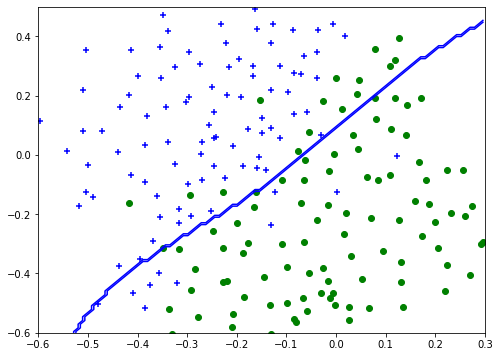

In [27]:
plt.figure(figsize=(8,6))
pos3,neg3= (y3==1).reshape(m3,1),(y3==0).reshape(m3,1)
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],marker="+",c='blue')
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],marker="o",c='green')

#creating a meshgrid

X3_min,X3_max=X3[:,0].min(),X3[:,0].max()
y3_min,y3_max=X3[:,1].min(),X3[:,1].max()


# we will use meshgrid so Return coordinate matrices from coordinate vectors.Make N-D coordinate arrays
#for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate
#arrays x1, x2,…, xn.
# point in the mesh [x_min, x_max]x[y_min, y_max]
xx3,yy3=np.meshgrid(np.linspace(X3_min,X3_max,num=100),np.linspace(y3_min,y3_max,num=100))

#z predict the classification accoring to xx and yy
Z_rbf=classifier4.predict(np.c_[np.ravel(xx3),np.ravel(yy3)])
##numpy.c_ >>>Translates slice objects to concatenation along the second axis.
#>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
###array([[1, 2, 3, 0, 0, 4, 5, 6]])

# Put the result into a color plot
Z_rbf=Z_rbf.reshape(xx3.shape)
plt.contour(xx3,yy3,Z_rbf,1,colors='b')
plt.xlim(-0.6,0.3)
plt.ylim(-0.6,0.5)

## Spam Classification

In [31]:
import re #Regular expression for string search or match read here https://docs.python.org/3/howto/regex.html
from nltk.stem import PorterStemmer 
#The idea of stemming is a sort of normalizing method. 
# Many variations of words carry the same meaning, other than when tense is involved.
# read here
# https://pythonprogramming.net/stemming-nltk-tutorial/

file_content=open("emailSample1.txt","r").read()
vocab=open("vocab.txt","r").read()

In [35]:
print(file_content)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [70]:
vocab_list=vocab.split("\n")[:-1]
#vocab_list1=vocab.split("\n")
vocab_dict={}
for i in vocab_list:
    key=i.split("\t")[1]
    value=i.split("\t")[0]
    vocab_dict[key]=value
    

### Preprocessing emails

In [89]:
def processEmail(email_contents,vocabList_d):
    
    #Preprocesses the body of an email and returns a list of indices of the words contained in the email.
    
    # to lower case all the words for better comparison
    email_contents=email_contents.lower()
    
    #handle numbers i.e. replacing any no with string"number"
    email_contents=re.sub("[0-9]+","number",email_contents)
    
    #Handle URLS
    email_contents=re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents=re.sub("^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w+$","emailaddr",email_contents)
    
    #hadling $ sig (for money)
    email_contents=re.sub("[$]+","dollar",email_contents)
    
    #Stripping HTML(better all special character)
    email_contents=re.sub('[^a-zA-Z0-9 \n\.]', '',email_contents)
    
    #Word stemming
#     Word Stemming: Words are reduced to their stemmed form. For ex-
# ample, \discount", \discounts", \discounted" and \discounting" are all
# replaced with \discount". Sometimes, the Stemmer actually strips o
# additional characters from the end, so \include", \includes", \included",
# and \including" are all replaced with \includ".
    ps=PorterStemmer()
    email_contents=[ps.stem(token) for token in email_contents.split(" ")]
    email_contents=" ".join(email_contents)
    
    
    # Process the email and return word_indices
    
    word_indicies=[]
    
    for char in email_contents.split():
        if(len(char)>1) and char in vocabList_d:
            word_indicies.append(int(vocabList_d[char]))
    return word_indicies
        

In [90]:
word_indicies= processEmail(file_content,vocab_dict)

In [96]:
word_indicies[0:20] #assigning indices of word to the email content

[86,
 916,
 794,
 1077,
 883,
 370,
 1699,
 790,
 1822,
 1831,
 883,
 431,
 1171,
 794,
 1002,
 1895,
 1676,
 238,
 162,
 89]

### Extracting features from emails

You will now implement the feature extraction that converts each email into
a vector in Rn. For this exercise, you will be using n = # words in vocabulary
list. Specically, the feature xi 2 f0; 1g for an email corresponds to whether
the i-th word in the dictionary occurs in the email. That is, xi = 1 if the i-th
word is in the email and xi = 0 if the i-th word is not present in the email.

In [93]:
def emailFeatures(word_indicies,vocab_dict):
    #Takes in a word_indices vector and  produces a feature vector from the word indices so if word is i
    n=len(vocab_dict)
    features=np.zeros((n,1))
    
    for i in word_indicies:
        features[i]=1
        
    return features
        



In [98]:
feature_vector=emailFeatures(word_indicies,vocab_dict)
print("Length of feature vector: ",len(feature_vector))
print("Number of non-zero entries: ",np.sum(feature_vector))

Length of feature vector:  1899
Number of non-zero entries:  39.0


In [95]:
feature_vector 

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

## Training SVM for spam classification

In [99]:
spam_mat = loadmat("spamTrain.mat")
X_train =spam_mat["X"]
y_train = spam_mat["y"]

In [101]:
spam_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [105]:
C=0.1
spam_svc=SVC(C=C,kernel="linear")
spam_svc.fit(X_train,y_train)
print("Training accuracy:",(spam_svc.score(X_train,y_train.ravel()))*100,"%")

C:\Users\Kishan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy: 99.825 %


In [106]:
spam_mat_test = loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]

In [107]:
spam_svc.predict(X_test)
print("Test Accuracy:",(spam_svc.score(X_test,y_test.ravel()))*100,"%")

Test Accuracy: 98.9 %


### Top predictors for spam
To better understand how the spam classier works, we can inspect the parameters to see which words the classier thinks are the most predictive of spam. The next step of ex6 spam.m finds the parameters with the largest positive values in the classier and displays the corresponding words . Thus, if an email contains words such as \guarantee", \remove", \dollar", and \price", it is likely to be classified as spam.

In [171]:
weights=spam_svc.coef_[0]
weight_columns=np.hstack((np.arange(1,1900).reshape(1899,1),weights.reshape(1899,1)))
df=pd.DataFrame(weight_columns)

df.sort_values(by=[1],ascending=False,inplace=True)

In [172]:
predictor=[]
idx=[]

for i in df[0][:15]:
    for keys,values in vocab_dict.items():
        if str(int(i))==values:
            predictor.append(keys)
            idx.append(int(values))
        

In [180]:
print("Top predictors of spam:")

for i in range(15):
    print(predictor[i],"\t \t",round(df[1][idx[i]-1],6))

Top predictors of spam:
our 	 	 0.500614
click 	 	 0.465916
remov 	 	 0.422869
guarante 	 	 0.383622
visit 	 	 0.36771
basenumb 	 	 0.345064
dollar 	 	 0.323632
will 	 	 0.269724
price 	 	 0.267298
pleas 	 	 0.261169
most 	 	 0.257298
nbsp 	 	 0.253941
lo 	 	 0.253467
ga 	 	 0.248297
hour 	 	 0.246404
